GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Metrics for ppb_processed.csv (Units: % (ppb)):
+---+----------+--------------------+-------------------+--------------------+
|   |  Model   |        MSE         |        MAE        |        RMSE        |
+---+----------+--------------------+-------------------+--------------------+
| 0 | ADMETlab | 37.416666666666664 |       3.25        | 6.1169164345008555 |
| 1 | preADMET |       265.0        |       13.0        | 16.278820596099706 |
| 2 | admetSAR | 148.04166666666666 | 6.708333333333333 | 12.167237429534556 |
| 3 | Admetica | 139.07664896871816 | 8.521180470784506 | 11.793076314885703 |
+---+----------+--------------------+-------------------+--------------------+


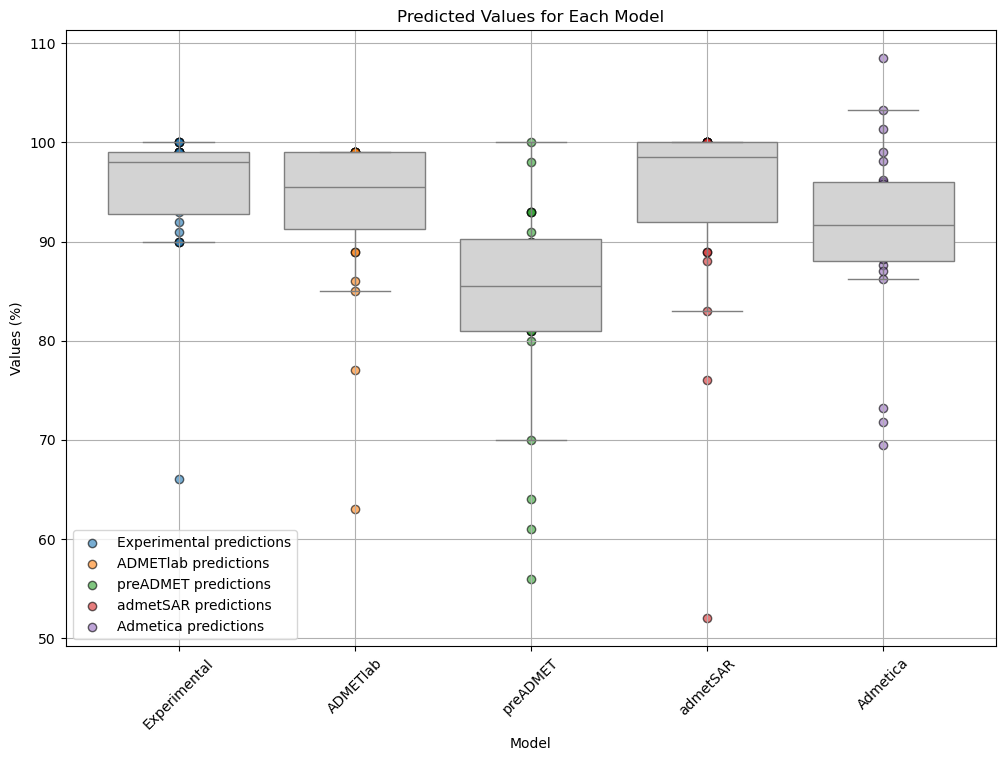

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Metrics for hia_processed.csv (0 or 1):
+---+------------+----------+-----------+--------+----------+
|   |   Model    | Accuracy | Precision | Recall | F1 Score |
+---+------------+----------+-----------+--------+----------+
| 0 |  ADMETlab  |   0.62   |   0.61    |  1.0   |   0.76   |
| 1 |  admetSAR  |   0.58   |   0.58    |  1.0   |   0.74   |
| 2 | FAF-Drug4  |   0.58   |   0.58    |  1.0   |   0.74   |
| 3 |   pkCSM    |   0.58   |   0.58    |  1.0   |   0.74   |
| 4 | SwissADMET |   0.62   |   0.63    |  0.86  |   0.73   |
| 5 |  Admetica  |   0.58   |   0.58    |  1.0   |   0.74   |
+---+------------+----------+-----------+--------+----------+


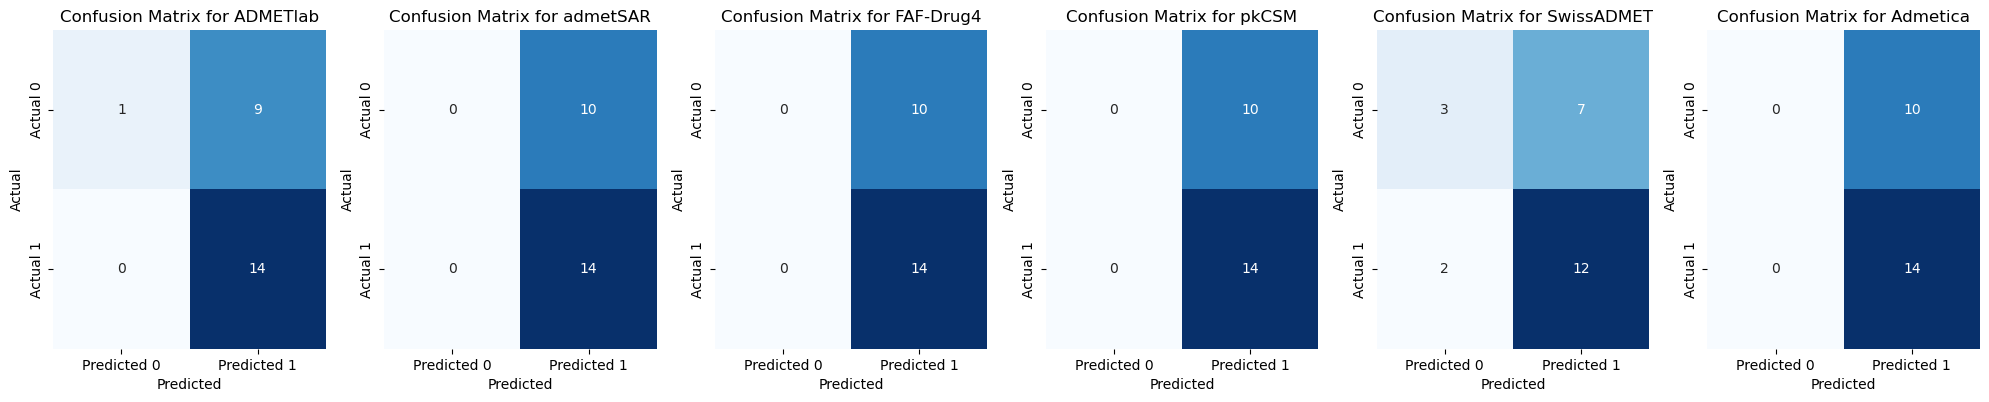

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Metrics for cyp3a4_processed.csv (0 or 1):
+---+----------+----------+-----------+--------+----------+
|   |  Model   | Accuracy | Precision | Recall | F1 Score |
+---+----------+----------+-----------+--------+----------+
| 0 | ADMETlab |   0.83   |    1.0    |  0.83  |   0.91   |
| 1 | admetSAR |   1.0    |    1.0    |  1.0   |   1.0    |
| 2 |  pkCSM   |   0.96   |    1.0    |  0.96  |   0.98   |
| 3 | preADMET |   0.46   |    1.0    |  0.46  |   0.63   |
| 4 | Admetica |   0.96   |    1.0    |  0.96  |   0.98   |
+---+----------+----------+-----------+--------+----------+


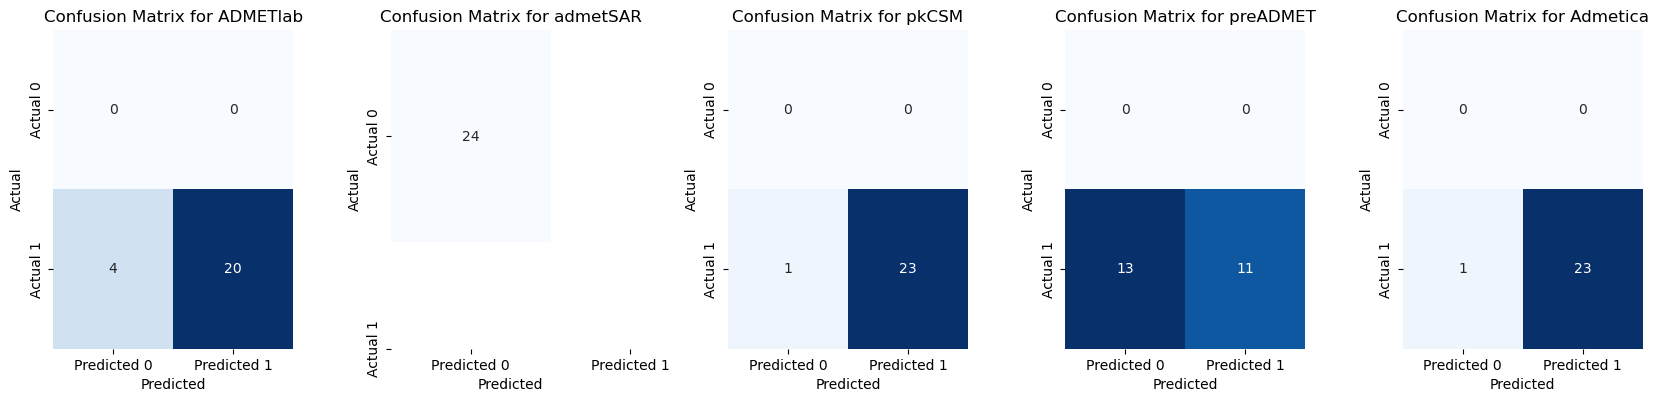

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/opt/anaconda3/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Predicting: |                                                                                                 …


Metrics for half-life_processed.csv (Units: hours):
+---+----------+--------------------+--------------------+--------------------+
|   |  Model   |        MSE         |        MAE         |        RMSE        |
+---+----------+--------------------+--------------------+--------------------+
| 0 | ADMETLab | 1647.9931528333334 |       32.862       | 40.595481926358914 |
| 1 | Admetica | 1162.8831737768123 | 29.211549806594846 | 34.10107291239987  |
+---+----------+--------------------+--------------------+--------------------+


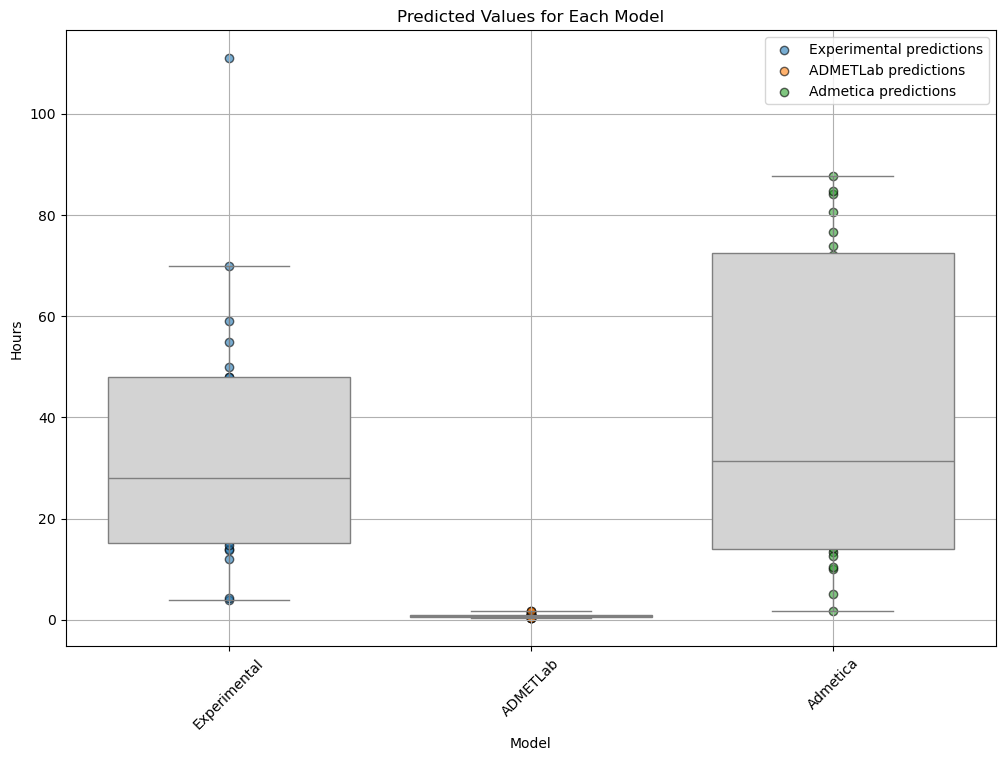

In [11]:
import os
import pandas as pd
import numpy as np
import torch
from lightning import pytorch as pl
from chemprop import data, featurizers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             accuracy_score, precision_score, 
                             recall_score, f1_score, confusion_matrix)
from tabulate import tabulate  # Import tabulate

def load_model(checkpoint_path):
    """Load a pre-trained model from a checkpoint path."""
    try:
        return models.MPNN.load_from_checkpoint(checkpoint_path)
    except Exception as e:
        print(f"Error loading model from {checkpoint_path}: {e}")
        return None

def featurize_smiles(smiles_list):
    """Convert SMILES strings to a dataset and return the dataloader."""
    test_data = [data.MoleculeDatapoint.from_smi(smi) for smi in smiles_list]
    featurizer = featurizers.SimpleMoleculeMolGraphFeaturizer()
    test_dset = data.MoleculeDataset(test_data, featurizer=featurizer)
    return data.build_dataloader(test_dset, shuffle=False)

def predict_property(model, dataloader):
    """Run inference on the provided model and dataloader."""
    with torch.inference_mode():
        trainer = pl.Trainer(
            logger=False,
            enable_progress_bar=True,
            accelerator="cpu",
            devices=1
        )
        test_preds = trainer.predict(model, dataloader)
        test_preds_flat = [item for sublist in test_preds for item in sublist]
    return test_preds_flat

def calculate_props_admetica(model_path, smiles_list):
    mpnn = load_model(model_path)
    if mpnn is None:
        return None

    test_loader = featurize_smiles(smiles_list)
    test_preds = predict_property(mpnn, test_loader)

    test_preds_list = [pred[0] for pred in test_preds]
    preds = pd.DataFrame({
        'SMILES': smiles_list,
        'Prediction': test_preds_list
    })
    return preds

def process_predictions(file_name, model_path, is_classification=False):
    """General function to process predictions for a given property."""
    # Load processed data
    current_path = os.getcwd()
    folder_path = os.path.join(current_path, 'predictors', 'processed')
    processed_data = pd.read_csv(f'{folder_path}/{file_name}')
    smiles_list = processed_data['Smiles']

    # Calculate properties
    preds_admetica = calculate_props_admetica(model_path, smiles_list)
    y_pred_prob_admet = preds_admetica['Prediction']
    processed_data['Admetica'] = [tensor.item() for tensor in y_pred_prob_admet]
    
    # Remove the 'Smiles' column
    processed_data = processed_data.iloc[:, 1:]

    if is_classification:
        # Classification metrics
        actual_values = processed_data.iloc[:, 0]  # Actual values
        predicted_columns = processed_data.columns[1:]  # Predicted values

        # Create a list to store metrics
        metrics_list = []
        
        for model in predicted_columns:
            predicted_values = (processed_data[model] > 0.5).astype(int)  # Binary prediction

            # Calculate metrics
            accuracy = accuracy_score(actual_values, predicted_values)
            precision = precision_score(actual_values, predicted_values)
            recall = recall_score(actual_values, predicted_values)
            f1 = f1_score(actual_values, predicted_values)

            # Store metrics
            metrics_list.append({
                'Model': model,
                'Accuracy': round(accuracy, 2),
                'Precision': round(precision, 2),
                'Recall': round(recall, 2),
                'F1 Score': round(f1, 2)
            })

        # Display the metrics with a header
        print(f"\nMetrics for {file_name} (0 or 1):")
        metrics_df = pd.DataFrame(metrics_list)
        print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))

        # Plot confusion matrices
        plt.figure(figsize=(20, 15))
        for i, model in enumerate(predicted_columns):
            plt.subplot(4, 6, i + 1)
            predicted_values = (processed_data[model] > 0.5).astype(int)
            cm = confusion_matrix(actual_values, predicted_values)

            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                        xticklabels=['Predicted 0', 'Predicted 1'],
                        yticklabels=['Actual 0', 'Actual 1'])
            plt.title(f'Confusion Matrix for {model}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')

        plt.tight_layout()
        plt.savefig(f'{file_name}_web_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

    else:
        # Regression metrics
        true_values = processed_data[processed_data.columns[0]]

        # Dictionary to store metrics for each model
        metrics = {}
        for model in processed_data.columns[1:]:
            predicted_values = processed_data[model]

            # Calculate metrics
            mse = mean_squared_error(true_values, predicted_values)
            mae = mean_absolute_error(true_values, predicted_values)
            rmse = np.sqrt(mse)

            metrics[model] = {
                'MSE': mse,
                'MAE': mae,
                'RMSE': rmse
            }

        # Display the metrics with a header
        print(f"\nMetrics for {file_name} (Units: {['% (ppb)' if 'ppb' in file_name else 'hours'][0]}):")
        metrics_df = pd.DataFrame.from_dict(metrics, orient='index').reset_index()
        metrics_df.columns = ['Model', 'MSE', 'MAE', 'RMSE']
        print(tabulate(metrics_df, headers='keys', tablefmt='pretty'))

        # Melt the final dataset for seaborn plotting
        data_melted = processed_data.melt(var_name='Model', value_name='Values')

        # Create a box plot for predicted values
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=data_melted, x='Model', y='Values', color='lightgray', showfliers=False)

        for col in data_melted['Model'].unique():
            plt.scatter([col] * len(processed_data[col]), processed_data[col], alpha=0.6, edgecolors='k', label=f'{col} predictions')

        plt.title('Predicted Values for Each Model')
        plt.xlabel('Model')
        plt.ylabel('Values (%)' if 'ppb' in file_name else 'Hours')
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()

        plt.savefig(f'{file_name}_web_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

# Define model paths for each property
admetica_folder = os.path.abspath(os.path.join(os.getcwd(), '..'))

# List of models and corresponding file names
models_info = [
    ('ppb_processed.csv', 'ADMET/distribution/ppbr/ppbr.ckpt', False),
    ('hia_processed.csv', 'ADMET/absorption/hia/hia.ckpt', True),
    ('cyp3a4_processed.csv', 'ADMET/metabolism/cyp3a4-substrate/cyp3a4-substrate.ckpt', True),
    ('half-life_processed.csv', 'ADMET/excretion/half-life/half-life.ckpt', False)
]

# Process each model
for file_name, model_path, is_classification in models_info:
    full_model_path = os.path.join(admetica_folder, model_path)
    process_predictions(file_name, full_model_path, is_classification)